# Data Science 3 (prediction)

## End to end example

**Teachers:**

* Supervised learning: Fenna Feenstra (FEFE)

**Data files:**

* heart_failure_clinical_records_dataset.csv
* data_description.csv


This notebook demonstrates the steps to build a supervised machine learning model. The following steps are performed

1. Data is loaded. 
2. Data is inspected
3. Data is visualized to gain more understanding about the data
4. Data is prepared for the model to train
5. Model is trained on the prepared data
6. Model is used to test the working of the model
7. Model is evaluated
8. Model is improved




##  Supervised learning 

Cardiovascular diseases kill approximately 17 million people globally every year, and they mainly exhibit as myocardial infarctions and heart failures. Heart failure occurs when the heart cannot pump enough blood to meet the needs of the body. Available electronic medical records of patients quantify symptoms, body features, and clinical laboratory test values, which can be used to perform biostatistics analysis aimed at highlighting patterns and correlations otherwise undetectable by medical doctors. Machine learning, can predict patients’ survival from their data and can individuate the most important features among those included in their medical records[1]. In this we build a machine learning classifier to predict a patient's survival. The goal is to select the most important features for predicting the patient's survival. Data for the analysis is available in `heart_failure_clinical_records_dataset.csv`. The data description is to be found in the table `data_description.csv`


In [1]:
#given code for data description
import pandas as pd
import numpy as np

md = pd.read_csv('data_description.csv', sep=';')
md

,Feature,Explanation,Measurement
0,Age,Age of patient,years
1,Anaemia,Decrease of red blood cells or hemoglobin,Boolean
2,High blood pressure,If a patient has hypertension,Boolean
3,Creatinine phosphokinase,Level of the CPK enzyme in the blood,mcg/L
4,Diabetes,If the patient has diabetes,Boolean
5,Ejection fraction,Percentage of blood leaving the heart at each ...,Percentage
6,Sex,Woman or Man,Binary
7,Platelets,Platelets in the blood,kiloplatelets/mL
8,Serum creatinine,Level of creatinine in the blood,mg/dL
9,Serum sodium,Level of sodium in the blood,mEq/L



### Inspect the data
 

Data is loaded. The Time feature is dropped, since this is not a biometric.  After loading the data the following questions are answered by the aid of creating meaningfull visualizations and overviews. 

1. Is the dataset balanced? How might that affect the confusion matrix
2. Based on the datatype of each feature, are there any features that cannot be used in a logistic regression classifier? 
3. Is imputation needed?

In [2]:
#Load the data. Drop the Time feature, since this is not a biometric
import pandas as pd
import numpy as np

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = df.drop(['time'],axis = 1) 
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [3]:
# are there any features that cannot be used in a logistic regression classifier? 
df.info() 
# all datatypes needs to be numeric to do the calculations. 
# All datatypes are float or integers and therefor can be used in a classifier. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


Number of survived:  203
Number of deaths:  96


% of survived 67.9 %
% of death 32.1 %


<AxesSubplot:>

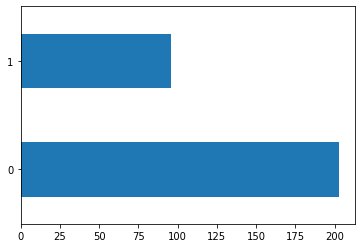

In [4]:
df['DEATH_EVENT'].value_counts() 
# Because of the imbalance of the dataset, 
# all the methods obtained better prediction scores on the true negative rate (predicting death), 
# rather than on the true positive rate

survived, dead = df['DEATH_EVENT'].value_counts()
print('Number of survived: ', survived)  
print('Number of deaths: ', dead) 

print('\n')
print('% of survived', round(survived / len(df) * 100, 1), '%')
print('% of death', round(dead / len(df) * 100, 1), '%')


df.DEATH_EVENT.value_counts().plot(kind='barh')

In [5]:
# missing data
df.isnull().sum() 
# no missing data, no imputation needed

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

### Feature selection

We Create a meaningful visualization to estimate the 3 most important features. 


<AxesSubplot:>

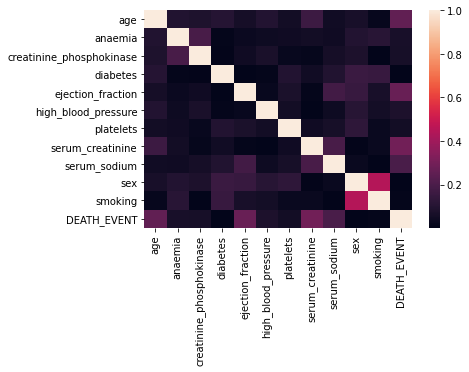

In [6]:

import seaborn as sns
c = df.corr().abs()
sns.heatmap(c)
# age, ejection_fraction, serum_creatinine do have most light colors -> strongest contributers?
# a model with biometrics is for medical use. It is often expensive to acquire the data, 
# a simpel model which has an acceptable performance metrics is the most practical. Feature 
# selection might also improve overfitting

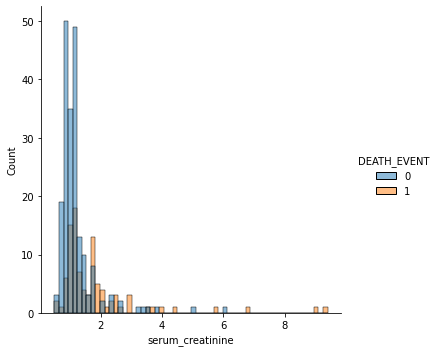

In [19]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df, x="serum_creatinine", hue="DEATH_EVENT")
plt.show()

### Build a classifier


We will build a logistic regression classifier. Next we will evaluate the logistic regression classifier using the confusion matrix. Lastly we create a new patient and predict if the patient will survive. 


The df dataframe is the dataframe containing all the raw data (numbers). We will use this to fill the feature matrix $X$ and the vector $y$ with the labeled class. 


\begin{equation}
X = 
   \begin{bmatrix} \
    x_1^{(1)}  & x_2^{(1)} & x_3^{(1)} & .. & x_n^{(1)}\\
    x_1^{(2)}  & x_2^{(2)} & x_3^{(2)} & .. & x_n^{(2)}\\ 
    x_1^{(3)}  & x_2^{(3)} & x_3^{(3)} & .. & x_n^{(3)} \\ 
    .. & .. & .. & .. & ..\\ 
    x_1^{(m)}  & x_2^{(m)} & x_3^{(m)}  & .. & x_n^{(m)}\\ 
   \end{bmatrix} 
   \
   %
   y = 
   \begin{bmatrix} \
   y^{(1)} \\
   y^{(2)} \\ 
   y^{(3)} \\ 
   .. \\ 
   y^{(m)} \\ 
   \end{bmatrix} 
  %
\end{equation}



In [15]:
# Build model 
#preprosses data 
y = np.array(df['DEATH_EVENT'])
X = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]] #without feature selection

#normalise 
from sklearn.preprocessing import StandardScaler

def normalize(X):
    scalar = StandardScaler()
    scalar = scalar.fit(X)
    X = scalar.transform(X)
    return X

X = normalize(X)
X.shape

#split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#train  
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# optional verify feature weights
for i in model.coef_:
       for index, j in enumerate(i):        
            print(f"{j}  {list(df.columns.values)[index]}")
# indeed age, ejection_fraction and serum_creatinine are driving the outcome the most

0.7253082813259177  age
0.286555903499635  anaemia
0.31181933761020514  creatinine_phosphokinase
-0.009957421701775389  diabetes
-0.6497281156851185  ejection_fraction
0.01182128282147343  high_blood_pressure
-0.1005922196223276  platelets
0.5963808962998414  serum_creatinine
-0.23179239140941202  serum_sodium
-0.32050283241277727  sex
0.027561999699712233  smoking


In [9]:
# evaluate the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))
# Accuracy is not that high Indeed negatives are predicted better then positives. 



[[38  3]
 [10  9]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        41
           1       0.75      0.47      0.58        19

    accuracy                           0.78        60
   macro avg       0.77      0.70      0.72        60
weighted avg       0.78      0.78      0.77        60



test  acc: 0.7333333333333333
train acc: 0.7740585774058577


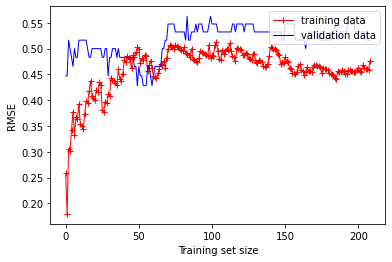

In [21]:
 # function to evaluate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

def plot_learning_curves(model, X_train, y_train, X_val, y_val):
    """
    input:
        model:pipeline object
        X_train, y_train: training data
        X_val, y_val: test data
    """
    train_errors, val_errors = [], []
    for m in range(30, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=1, label="training data")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=1, label="validation data")
    plt.legend(loc="upper right", fontsize=10)   
    plt.xlabel("Training set size", fontsize=10) 
    plt.ylabel("RMSE", fontsize=10)     
    # compare accuracy train versus test to access overfit 
    print(f'test  acc: {model.score(X_val, y_val)}')
    print(f'train acc: {model.score(X_train, y_train)}')
    
    
plot_learning_curves(model, X_train, y_train, X_test, y_test)

In [10]:
# and or new model with feature selection 
y = np.array(df['DEATH_EVENT'])
X = df.iloc[:,[0,4,7]]
#normalise
from sklearn.preprocessing import StandardScaler

def normalize(X):
    scalar = StandardScaler()
    scalar = scalar.fit(X)
    X = scalar.transform(X)
    return X

X = normalize(X)
#split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#train LogisticRegression
new_model = LogisticRegression()
new_model.fit(X_train, y_train)
# evaluate the model. Is your assumption of contribution features correct based on the outcome?
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = new_model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))
# optional

print(new_model.coef_)

[[33  3]
 [11 13]]
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        36
           1       0.81      0.54      0.65        24

    accuracy                           0.77        60
   macro avg       0.78      0.73      0.74        60
weighted avg       0.78      0.77      0.76        60

[[ 0.57099204 -0.80803023  0.60672077]]


In [11]:
print(f"survivalrate: {round(new_model.predict_proba([[25, 25, 2.0]])[0][0], 3)}") 

survivalrate: 0.997


### improving the model

What might be another classifier suitable for the dataset and the problem? 

In [12]:
#1 Decision trees often perform well on imbalanced datasets because their hierarchical structure allows 
#  them to learn signals from both classes.
#2 cross validation is advisable because of the small sample. 

In [13]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

In [14]:
# improve model for instance with AdaBoost (applicabl for binary classes)
adb = AdaBoostClassifier(LogisticRegression(), n_estimators = 10, learning_rate = 1)
adb.fit(X_train, y_train)

y_pred = adb.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))


[[34  2]
 [13 11]]
              precision    recall  f1-score   support

           0       0.72      0.94      0.82        36
           1       0.85      0.46      0.59        24

    accuracy                           0.75        60
   macro avg       0.78      0.70      0.71        60
weighted avg       0.77      0.75      0.73        60

